# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/Users/kaiqu/OneDrive/Área de Trabalho/M18 - Regressão Linear/ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [4]:
# Verificando se temos dados faltantes
df.isnull().values.any()

False

In [5]:
# Verificando novamente
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

In [6]:
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [7]:
# Identificando presença de Outliers e verificando distribuição dos dados.
print(df.describe())

       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.000000     2.00000  
max   

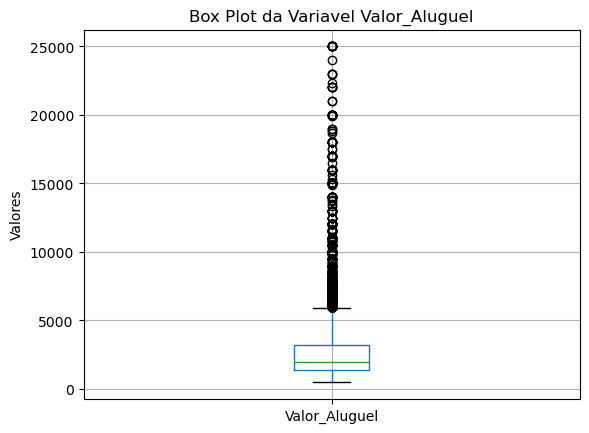

In [8]:
# Criação de Box Plot
df.boxplot(column='Valor_Aluguel')
plt.title('Box Plot da Variavel Valor_Aluguel')
plt.ylabel('Valores')
plt.show()

Aqui já podemos analisar a presença de Outliers.

In [9]:
df_nao_zero = df[df['Valor_Aluguel']  != 0]

fig = px.box(df_nao_zero, y='Valor_Aluguel', title='Box Plot da Valor_Aluguel (Valores Diferentes de Zero)', labels={'Valor_Aluguel': 'Valores'})
fig.show()

In [10]:
# Visualizando as ocorrencias onde Valor_Aluguel > 5900
df[df['Valor_Aluguel'] > 5900]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6454,5990,1188,164,3,5,3,3
6455,5999,1400,175,4,4,1,2
6456,6000,800,150,3,4,3,2
6457,6000,0,152,2,2,1,1
6458,6000,1100,43,1,2,1,1
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [11]:
# Verificando Porcentagem do Valor_Aluguel > 5900
print("Porcentagem de registros onde 'Valor_Aluguel' > 5900:",
      (len(df[df['Valor_Aluguel'] > 5900]) / len(df)) * 100)

Porcentagem de registros onde 'Valor_Aluguel' > 5900: 10.398445092322643


Como os dados de 'Valor_Aluguel' são valores reais e na analise feita dos dados acima de 5900 equivalem a 10% dos nossos dados.

Sendo feita a analise a melhor opção é manter a coluna.

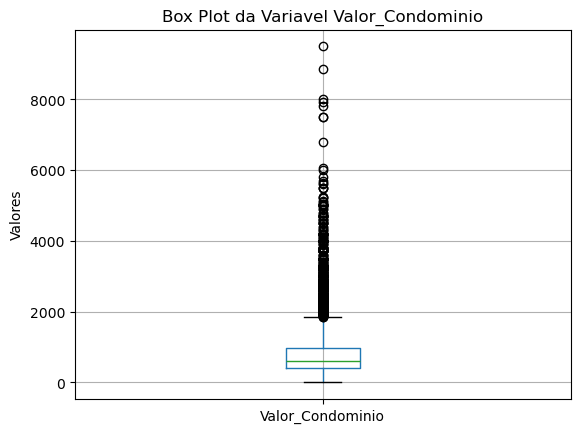

In [12]:
# Criação de Box Plot
df.boxplot(column='Valor_Condominio')
plt.title('Box Plot da Variavel Valor_Condominio')
plt.ylabel('Valores')
plt.show()

In [13]:
df_nao_zero = df[df['Valor_Condominio']  != 0]

fig = px.box(df_nao_zero, y='Valor_Condominio', title='Box Plot da Valor_Condominio (Valores Diferentes de Zero)', labels={'Valor_Condominio': 'Valores'})
fig.show()

In [14]:
# Visualizando as ocorrencias onde Valor_Condomino > 1941
df[df['Valor_Condominio'] > 1941]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
1649,1300,2435,208,4,3,2,3
2083,1400,1966,30,1,1,0,1
2156,1500,2893,230,3,2,1,2
2492,1500,2893,230,3,2,1,2
2898,1699,2256,42,1,2,1,1
...,...,...,...,...,...,...,...
7197,25000,5636,327,4,3,2,3
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7


In [15]:
# Verificando Porcentagem do Valor_Condominio > 1941
print("Porcentagem de registros onde 'Valor_Condominio' > 1941:",
      (len(df[df['Valor_Condominio'] > 1941]) / len(df)) * 100)

Porcentagem de registros onde 'Valor_Condominio' > 1941: 7.510759405803137


Os dados de 'Valor_Condominio' são reais e os dados que estão indiferentes dos outros equivalem a 8% do nosso DataFrame.

Então a melhor opção é manter os dados.

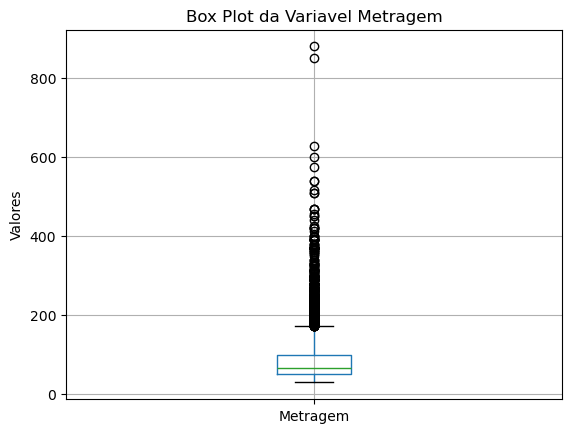

In [16]:
# Criação de Box Plot
df.boxplot(column='Metragem')
plt.title('Box Plot da Variavel Metragem')
plt.ylabel('Valores')
plt.show()

In [17]:
df_nao_zero = df[df['Metragem']  != 0]

fig = px.box(df_nao_zero, y='Metragem', title='Box Plot da Metragemm (Valores Diferentes de Zero)', labels={'Metragemm': 'Valores'})
fig.show()

In [18]:
# Visualizando as ocorrencias onde Metragem > 172
df[df['Valor_Condominio'] > 172]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
5,500,380,66,2,1,0,1
9,600,325,50,2,2,1,1
11,600,600,35,1,2,1,1
12,600,250,48,2,2,1,1
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [19]:
# Verificando Porcentagem do Valor_Condominio > 172
print("Porcentagem de registros onde 'Metragem' > 172:",
      (len(df[df['Metragem'] > 172]) / len(df)) * 100)

Porcentagem de registros onde 'Metragem' > 172: 8.982368457587118


Os dados de 'Metragem' são reais e os dados que estão indiferentes dos outros equivalem a 9% do nosso DataFrame.

Então a melhor opção é manter os dados.

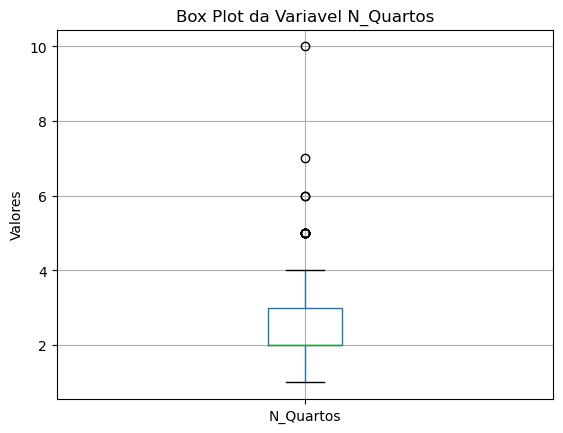

In [20]:
# Criação de Box Plot
df.boxplot(column='N_Quartos')
plt.title('Box Plot da Variavel N_Quartos')
plt.ylabel('Valores')
plt.show()

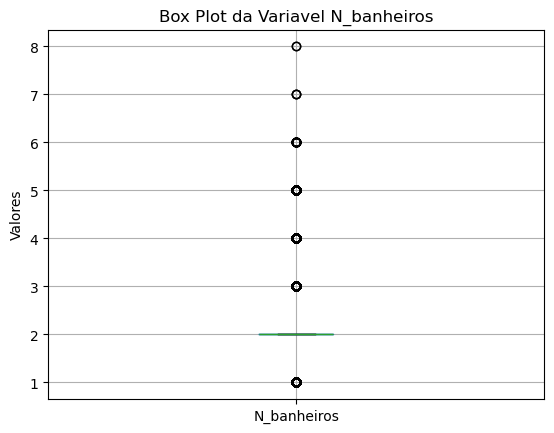

In [21]:
# Criação de Box Plot
df.boxplot(column='N_banheiros')
plt.title('Box Plot da Variavel N_banheiros')
plt.ylabel('Valores')
plt.show()

Sendo realizada a analise, pode se dizer que 'N_Quartos' e 'N_banheiros' tem valores reais que batem com os dados das outras categorias. Sendo assim, vamos manter todos os nossos dados.

In [22]:
# (c) Analise Bivariada
df.head()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0


Existe relação entre o Aluguel e o valor do condominio?
Qual a relação entre o valor do condominio e a metragem?
A quantidade de banheiros influência no numero de suítes?

In [23]:
# relação entre o Aluguel e o valor do condominio
media_salario_mensal_por_idade = df.groupby('Valor_Condominio')['Valor_Aluguel'].mean().reset_index()

fig = px.line(media_salario_mensal_por_idade, x='Valor_Condominio', y='Valor_Aluguel',
              title='Relação entre Valor_Condominio e Média de Valor_Aluguel',
              labels={'Valor_Condominio': 'Valor_Condominio', 'Valor_Aluguel': 'Média de Valor_Aluguel'})

fig.show()

O valor do condominio vai variando com o valor do aluguel, tendo relação com o aumento do condominio em relação ao aumento do aluguel.

In [24]:
# Metragem x Valor do condomínio
mediana_metragem_valor_condominio = df.groupby('Metragem')['Valor_Condominio'].median().reset_index()

fig = px.bar(mediana_metragem_valor_condominio,
             x='Metragem',
             y='Valor_Condominio',
             title='Média de metragem por valor do condomínio',
             labels={'Metragem': 'Metragem', 'Valor_Condominio': 'Valor do Condomínio'})
fig.show()

Feita a analise com o gráfico, pode se dizer que quanto maior a metragem, maior vai ser o valor do condominio.

In [25]:
# N_banheiros x N_Suites
mediana_nbanheiro_nsuites = df.groupby('N_banheiros')['N_Suites'].median().reset_index()

fig = px.bar(mediana_nbanheiro_nsuites,
             x='N_banheiros',
             y='N_Suites',
             title='Média da quantidade de banheiros por suítes',
             labels={'N_banheiros': 'Número de Banheiros', 'N_Suites': 'Número de Suítes'})
fig.show()

Feita a analise, pode se dizer que quanto mais banheiros, mais suites o imovel vai ter.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




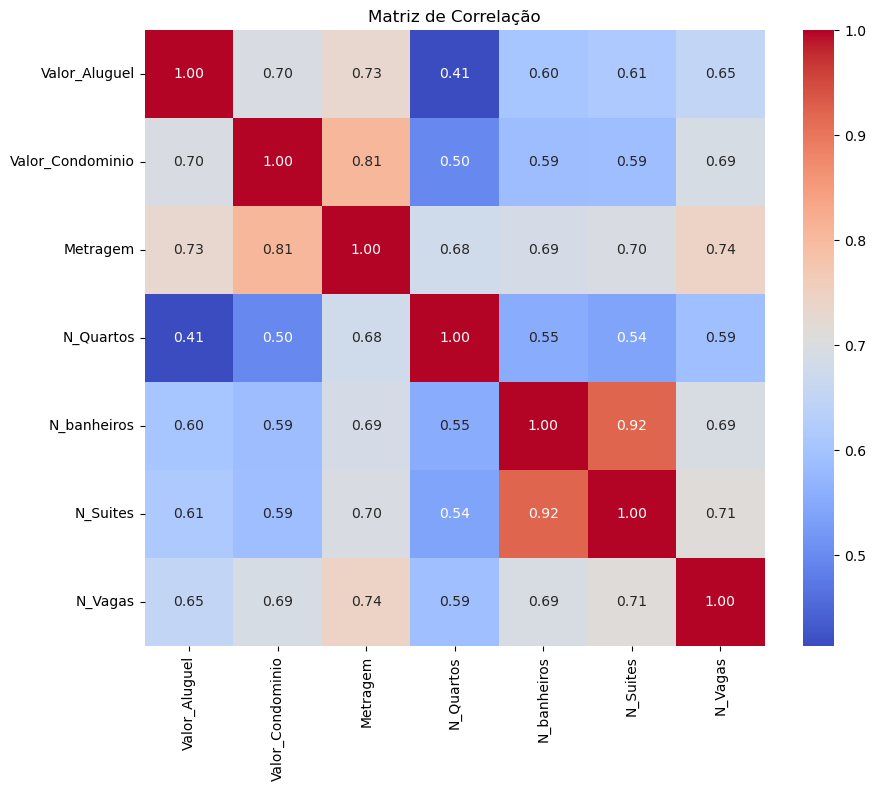

In [26]:
# Plotando grafico da matriz
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

Foi encontrado variaveis com alta correlação.

O Valor do Aluguel tem uma correlação alta com a Metragem e Valor do Condominio, confirmando a Analise Bivariada acima.

Metragem tem uma correlação alta com o Valor do Condominio e Numero de vagas.

O Numero de Quartos e Numero de Banheiros tem uma alta correlação com a Metragem.

Numero de Suites tem alta correlação com o Numero de Banheiros, confirmando a Analise Bivariada acima.

Podemos confirmar também que nossa Base Preditora 'Valor_Aluguel' tem conrrelação com todas as colunas.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [27]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [28]:
# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# O parâmetro 'test_size' determina a proporção dos dados que serão separados para teste (25% neste exemplo)
# O parâmetro 'random_state' é usado para garantir que a divisão seja reproduzível

In [29]:
X_train


,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6931,1350,176,3,4,3,3
4125,680,70,1,1,0,2
6079,650,66,2,1,0,1
5044,655,68,3,2,1,1
2299,330,33,1,1,0,1
...,...,...,...,...,...,...
3772,450,48,2,2,1,1
5191,570,34,1,1,0,1
5226,976,95,2,2,1,1
5390,550,74,3,3,1,2


In [30]:
X_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
3885,484,50,2,1,0,1
4661,680,50,2,1,0,1
1038,0,58,2,2,1,1
5867,1226,127,3,1,0,2
5099,697,90,4,3,1,2
...,...,...,...,...,...,...
4689,1250,160,3,3,1,2
5313,530,43,1,2,1,1
5624,1250,147,4,4,2,3
4647,650,53,2,1,0,1


In [31]:
y_train

6931    10000
4125     2200
6079     4500
5044     2900
2299     1500
        ...  
3772     2000
5191     3000
5226     3000
5390     3200
860      1100
Name: Valor_Aluguel, Length: 5402, dtype: int64

In [32]:
y_test

3885    2100
4661    2500
1038    1200
5867    4000
5099    3000
        ... 
4689    2550
5313    3100
5624    3500
4647    2500
4453    2500
Name: Valor_Aluguel, Length: 1801, dtype: int64

In [33]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (5402, 6)
Tamanho de X_test: (1801, 6)
Tamanho de y_train: (5402,)
Tamanho de y_test: (1801,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linear simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [34]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [35]:
X

,Metragem
6931,176
4125,70
6079,66
5044,68
2299,33
...,...
3772,48
5191,34
5226,95
5390,74


In [36]:
#Criando modelo, usando LinearRegression e as bases de treino.

regressao_metragem = LinearRegression()
regressao_metragem.fit(X,y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [37]:
# Plotando o Intercept
regressao_metragem.intercept_

-103.17820863080124

In [38]:
# Plotando o Coef
regressao_metragem.coef_

array([34.70818769])

Nossa equação seria:  

Nossa equação seria:  **METRAGEM** = -103.1*(METRAGEM) + 34.7

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [39]:
# Calculando R quadrado
regressao_metragem.score(X,y)

0.5213271756253639

Um coeficiente de determinação R2 de 0.52 indica que aproximadamente 52% da variação na variável dependente é explicada pelas variáveis independentes incluídas no modelo de regressão.
Com isso significa que o modelo de regressão é capaz de prever 50%  a variabilidade nos valores da variável dependente com base nas variáveis independentes. É um indicador que pode indicar que há outros fatores influenciando os resultados.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

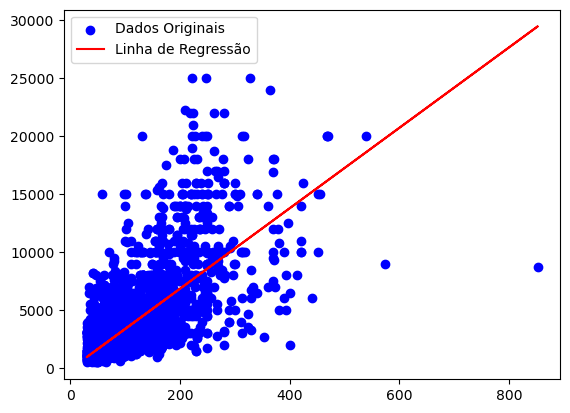

In [40]:
# Plotar os dados originais
plt.scatter(X, y, color='blue', label='Dados Originais')

# Plotar a linha de regressão
plt.plot(X, regressao_metragem.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [41]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [42]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_metragem.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_metragem.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


In [43]:
previsoes = regressao_metragem.predict(X)
previsoes

array([6005.46282439, 2326.3949295 , 2187.56217875, ..., 3194.09962169,
       2465.22768025, 1562.81480038])

In [44]:
# Aqui conseguimos visualizar todos os valores preditos e podemos comparar eles com os valores reais.
y

6931    10000
4125     2200
6079     4500
5044     2900
2299     1500
        ...  
3772     2000
5191     3000
5226     3000
5390     3200
860      1100
Name: Valor_Aluguel, Length: 5402, dtype: int64

Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

Sendo feita a avaliação dos dados, pode se dizer que o modelo de regressão é capaz de prever 56%  a variabilidade nos valores da variável dependente com base nas variáveis independentes. É um indicador que pode indicar que há outros fatores influenciando os resultados.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

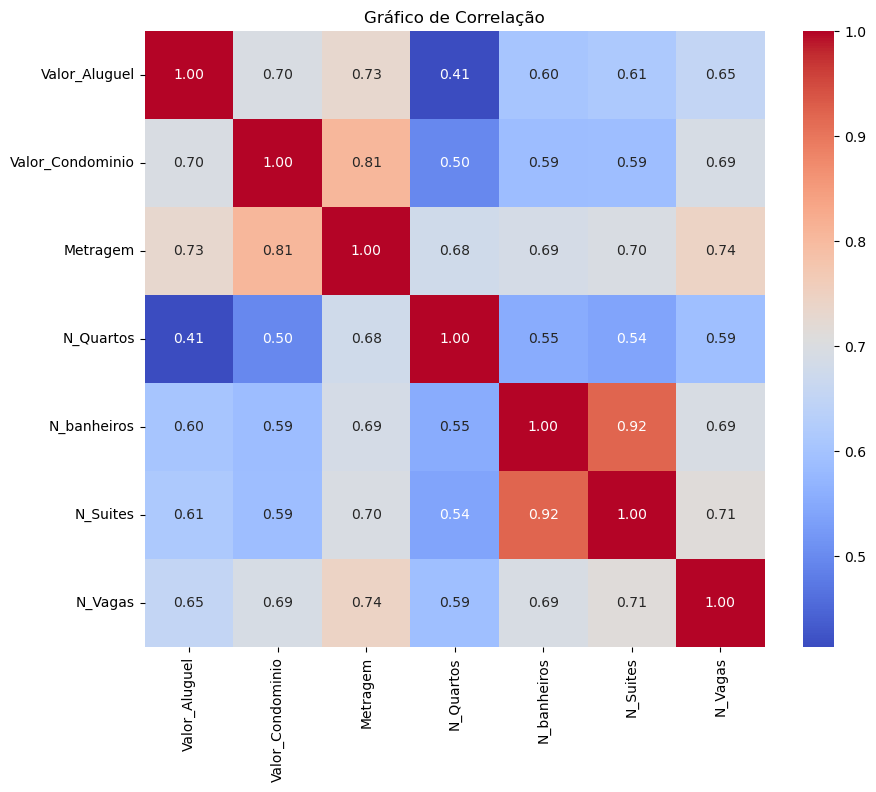

In [45]:
# Calculando a matriz de correlação
correlacao = df.corr()

# Gráfico:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlação')
plt.show()

Notamos que a correlação para a grande maioria das variáveis independentes com a variável de Valor_Aluguel é bem grande.
Entretanto a variável N_Quartos parece ter uma correlação mais baixa.

In [46]:
# Separar a variáveis independentes da variável dependente
X = X_train[['Valor_Condominio','Metragem','N_Quartos','N_banheiros','N_Suites','N_Vagas']] # Variável independente (características)
y = y_train  # Variável dependente (rótulo)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [47]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X,y)

LinearRegression()

In [48]:
regressao_multipla.intercept_

411.92895077384674

In [49]:
regressao_multipla.coef_

array([   0.77302112,   20.72122898, -659.00604215,  240.76046013,
        340.61447028,  522.98401929])

Coeficientes Positivos indicam uma relação positiva, já Coeficientes Negativos indicam uma relação negativa.

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [50]:
# Avaliando o Modelo
regressao_multipla.score(X,y)

0.5971610197647366

O Modelo apresenta um resulto bom, com cerca de 60% de chance de acertar. Mas podemos tentar prever resultados melhores analisando só com as variaveis independentes com alta correlação com de alta correlação com a variavel dependente.

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [51]:
# Separar a variáveis independentes da variável dependente
X = df[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]
y = df['Valor_Aluguel']


In [52]:
regressao_test1 = LinearRegression()
regressao_test1.fit(X,y)

LinearRegression()

In [53]:
# Resultado de R2
regressao_test1.score(X,y)

0.6076098775929859

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui

O R quadrado pela regressão simples foi de 56% de precisão.
O R quadrado pela regressão Multipla foi de 60% de precisão.

Sendo feita a analise, pode se dizer que a Regressão Multipla tem uma precisão melhor que o primeiro modelo. O resultado foi um pouco melhor porque foi incluido mais variaveis independentes que tem correlação com a Variavel Dependente que é Valor_Aluguel, sendo assim cada variavel impacta no resultado final do modelo.